In [56]:
import os
import glob

# Directory path
directory_path = "fitsfiles/extracted/SVM_M2_Default/"

# Initialize an empty list to store galaxy IDs
galaxy_ids = []

# List all directories in the given path
directories = os.listdir(directory_path)
directories
# Filter out directories that have .fits files
for folder in directories:
    folder_path = os.path.join(directory_path, folder)
    if os.path.isdir(folder_path):
        fits_files = os.listdir(folder_path)
        if any(file.endswith('.fits') for file in fits_files):
            galaxy_ids.append(folder)            

'599689'

In [147]:
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from tqdm import tqdm

df = pd.read_csv('Query.csv')

for galaxy_id in tqdm(galaxy_ids):
    directory_path = f"fitsfiles/extracted/SVM_M2_Default/{galaxy_id}/"

    # Use glob to find all *.fits files in the directory
    fits_files = glob.glob(directory_path + "*.fits")
    fits_file_path = fits_files[0]
    
    with fits.open(fits_file_path) as hdul:
        # Access the data in the FITS file (assuming it's a 2D image)
        data = hdul[0].data
        vals = data[~np.isnan(data)]
        lower = np.percentile(vals, 5)
        upper = np.percentile(vals, 95)
        max_speed = max(np.abs(lower), np.abs(upper))
        
        vsigma_re = df.loc[df['CATID'] == int(galaxy_id), 'VSIGMA_RE'].values[0]

        # Create a plot with 0 as white
        plt.figure(figsize=(8, 8))
        plt.imshow(data, cmap='RdBu', origin='lower', vmin=-max_speed, vmax=max_speed)  # Adjust the colormap as needed
        plt.colorbar()
        plt.title(f"Stellar Velocity Map. CAT ID: {galaxy_id}")
        plt.xlabel("X")
        plt.ylabel("Y")
    
        # Define the path where you want to save the image
        save_path = f"fitsfiles/extracted/SVM_M2_Default/images/{galaxy_id}_{vsigma_re:.2g}.png"

        # Save the image as PNG
        plt.savefig(save_path)
        plt.close()

100%|█████████████████████████████████████████| 288/288 [00:29<00:00,  9.64it/s]


In [140]:
import pandas as pd

df = pd.read_csv('Query.csv')
vsigma_re = df.loc[df['CATID'] == 278350, 'VSIGMA_RE'].values[0]

# Print the result
print(f"{result:.2g}")

0.69


In [135]:
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from tqdm import tqdm
import numpy as np

# Define the range for normalization
normalized_min = 0
normalized_max = 1

for galaxy_id in tqdm(galaxy_ids):
    directory_path = f"fitsfiles/extracted/SVM_M2_Default/{galaxy_id}/"

    # Use glob to find all *.fits files in the directory
    fits_files = glob.glob(directory_path + "*.fits")
    fits_file_path = fits_files[0]
    
    with fits.open(fits_file_path) as hdul:
        # Access the data in the FITS file (assuming it's a 2D image)
        data = hdul[0].data

        # Normalize the data
        vals = data[~np.isnan(data)]
        min_val = np.min(vals)
        max_val = np.max(vals)
        normalized_data = (data - min_val) / (max_val - min_val)  # Normalize to [0, 1]
        
        

        # Create a plot with normalized values
        plt.figure(figsize=(8, 8))
        plt.imshow(normalized_data, cmap='RdBu', origin='lower', vmin=normalized_min, vmax=normalized_max)  # Adjust the colormap as needed
        plt.colorbar()
        plt.title(f"Stellar Velocity Map. CAT ID: {galaxy_id}")
        plt.xlabel("X")
        plt.ylabel("Y")
    
        # Define the path where you want to save the image
        save_path = f"fitsfiles/extracted/SVM_M2_Default/images/{galaxy_id}.png"

        # Save the image as PNG
        plt.savefig(save_path)
        plt.close()


  0%|                                                   | 0/288 [00:00<?, ?it/s]

278350


IndexError: index 0 is out of bounds for axis 0 with size 0

#### Extracting TAR GZ FILE.

-- comes up with an error when extracting via jupyter. \
-- comes up with "tar: Error opening archive: Failed to open 'abc.gz'" when using `tar -xvzf abc.gz` via terminal.

In [28]:
import tarfile

def extract_tar_gz(file_path, destination_path):
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(destination_path)

# Usage example
file_path = "fitsfiles/SVM_M2_Default.tar.gz"
destination_path = "fitsfiles/extracted"

extract_tar_gz(file_path, destination_path)

In [9]:
import os
import tarfile
import glob

def extract_all_tar_gz_files(path):
    for zipped_file in glob.glob(os.path.join(path, "**/*.tar.gz"), recursive=True):
        tar = tarfile.open(zipped_file, "r:gz")
        tar.extractall(path=os.path.dirname(zipped_file))
        tar.close()

# Usage example
folder_path = "fitsfiles/extracted"
extract_all_tar_gz_files(folder_path)


In [3]:
from astropy.io import fits

file_path = "fitsfiles/24433_A_spectrum_3-arcsec_red.fits"

# Open the FITS file
hdul = fits.open(file_path)
# Access the PRIMARY HDU
#primary_hdu = hdul[0]

In [4]:
hdul[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 2048                                                  
EXTEND  =                    T                                                  
RADIUS  =    2.999999999999976 / Radius of the aperture in spaxels              
ELLIP   =                    0 / Ellipticity of the aperture (1-b/a)            
POS_ANG =                    0 / Position angle of the major axis, N->E         
KPC_SIZE=    3.441081064293633 / Size of 1 kpc at galaxy distance in pixels     
Z_TONRY =  0.02899414114654064 / Redshift used to calculate galaxy distance     
N_SPAX  =                   32 / Number of spaxels included in mask             
WCSAXES =                    1 / Number of coordinate axes                      
CRVAL1  =       6849.7020029

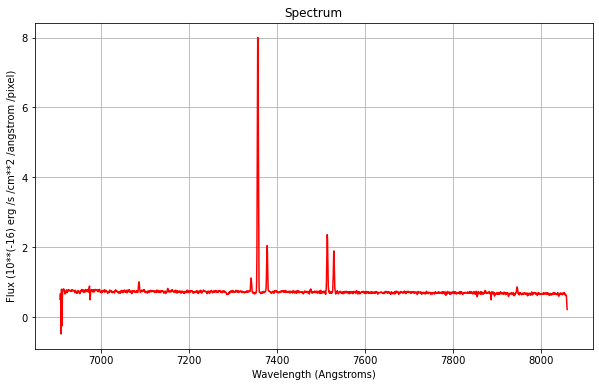

In [5]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Define the path to the FITS file
file_path = "fitsfiles/24433_A_spectrum_3-arcsec_red.fits"

# Open the FITS file
hdul = fits.open(file_path)

# Access the spectral data and header
data = hdul[0].data
header = hdul[0].header

# Extract relevant header information and convert to the appropriate data types
wavelength_start = float(header['CRVAL1'])  # Starting wavelength in Angstroms
wavelength_step = float(header['CDELT1'])   # Wavelength increment in Angstroms
flux_unit = header['BUNIT']                # Units of the flux values

# Create an array of wavelengths
wavelengths = [wavelength_start + wavelength_step * i for i in range(len(data))]

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data, color='red')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel(f'Flux ({flux_unit})')
plt.title('Spectrum')
plt.grid(True)
plt.show()


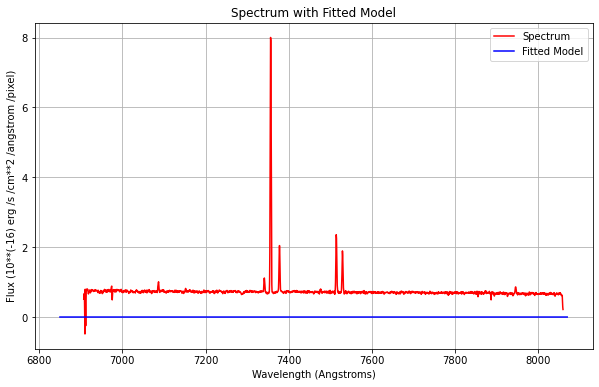

In [6]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting

# Define the path to the FITS file
file_path = "fitsfiles/24433_A_spectrum_3-arcsec_red.fits"

# Open the FITS file
hdul = fits.open(file_path)

# Access the spectral data and header
data = hdul[0].data
header = hdul[0].header

# Extract relevant header information and convert to the appropriate data types
wavelength_start = float(header['CRVAL1'])  # Starting wavelength in Angstroms
wavelength_step = float(header['CDELT1'])   # Wavelength increment in Angstroms
flux_unit = header['BUNIT']                # Units of the flux values

# Create an array of wavelengths
wavelengths = [wavelength_start + wavelength_step * i for i in range(len(data))]

# Define a model for fitting (e.g., Gaussian)
model = models.Gaussian1D(amplitude=1.0, mean=6563.0, stddev=10.0)

# Initialize a fitter (e.g., nonlinear least squares)
fitter = fitting.LevMarLSQFitter()

# Fit the model to the data
fitted_model = fitter(model, wavelengths, data)

# Plot the spectrum and fitted model
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, data, color='red', label='Spectrum')
plt.plot(wavelengths, fitted_model(wavelengths), color='blue', label='Fitted Model')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel(f'Flux ({flux_unit})')
plt.title('Spectrum with Fitted Model')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Define the path to the FITS file
file_path = "fitsfiles/extracted/sami/dr3/ifs/7289/7289_A_annular_blue.fits"

# Open the FITS file
hdul = fits.open(file_path)

# Access the PRIMARY HDU (assuming your data is in the primary HDU)
primary_hdu = hdul[0]

# Access the 3D data array
data_3d = primary_hdu.data

# Get the shape of the 3D data array
shape = data_3d.shape

# Create a series of 2D images (spectral slices)
for i in range(shape[0]):  # Loop over the spectral dimension
    plt.figure(figsize=(6, 6))
    plt.imshow(data_3d[i], cmap='viridis')  # You can choose a different colormap
    plt.colorbar()
    plt.title(f"Spectral Slice {i}")
    plt.show()
    raise ValueError("hi")


FileNotFoundError: [Errno 2] No such file or directory: 'fitsfiles/extracted/sami/dr3/ifs/7289/7289_A_annular_blue.fits'